<a href="https://colab.research.google.com/github/SambhavVinay/Pneumonia_Normal_ML/blob/main/Pneumoni_Normal_ChestXRay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import os, zipfile

In [3]:
with zipfile.ZipFile("Pneumonia_normal_Chest.zip", "r") as r_zip:
  r_zip.extractall(".")

In [4]:
base_dir = os.path.join("/content", 'Pneumonia_normal_Chest')
train_dir = "/content/train"
test_dir = "/content/test"

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
size = (150,150)

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=size,
    batch_size=20,
    class_mode='binary'
)
test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=size,
    batch_size=20,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


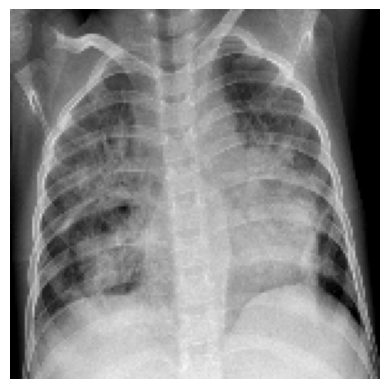

Label (numeric): 1.0
Label (class name): PNEUMONIA


In [48]:
import matplotlib.pyplot as plt
import numpy as np

images, labels = next(train_gen)

plt.imshow(images[0])
plt.axis("off")
plt.show()

print("Label (numeric):", labels[0])
print("Label (class name):", list(train_gen.class_indices.keys())[int(labels[0])])


In [15]:
from keras import layers, models

In [17]:
model = models.Sequential([
    layers.Conv2D(32,(3,3), activation='relu',input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128,(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(
    train_gen,
    epochs = 10,
    validation_data=test_gen
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 60s 208ms/step - accuracy: 0.8535 - loss: 0.3825 - val_accuracy: 0.7788 - val_loss: 0.5861
Epoch 2/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 50s 193ms/step - accuracy: 0.9612 - loss: 0.1075 - val_accuracy: 0.7564 - val_loss: 0.9449
Epoch 3/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 49s 189ms/step - accuracy: 0.9765 - loss: 0.0680 - val_accuracy: 0.7404 - val_loss: 0.9661
Epoch 4/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 49s 189ms/step - accuracy: 0.9765 - loss: 0.0603 - val_accuracy: 0.7644 - val_loss: 0.8708
Epoch 5/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 51s 194ms/step - accuracy: 0.9856 - loss: 0.0420 - val_accuracy: 0.7372 - val_loss: 1.4926
Epoch 6/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 80s 188ms/step - accuracy: 0.9830 - loss: 0.0398 - val_accuracy: 0.7997 - val_loss: 0.7675
Epoch 7/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 50s 192ms/step - accuracy: 0.9858 - loss: 0.0380 - val_accuracy: 0.7324 - val_loss: 1.7864
Epoch 8/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 50s 193ms/step - accuracy: 0.9926 - loss: 0

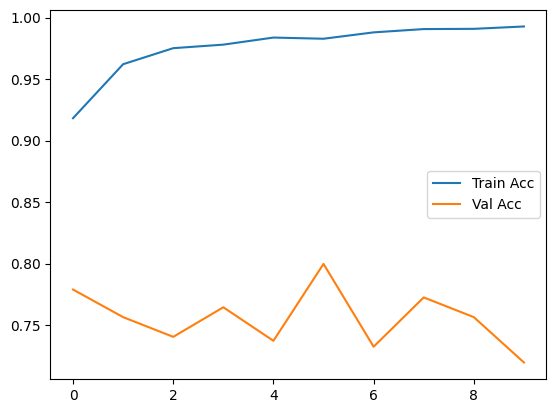

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


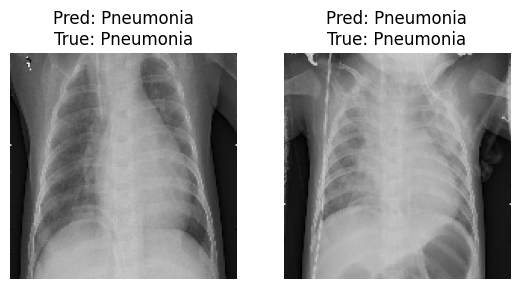

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image


val_batch = next(test_gen)
images, labels = val_batch


preds = model.predict(images)


plt.figure(figsize=(10,10))
for i in range(2):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    pred_label = "Pneumonia" if preds[i] > 0.5 else "Normal"
    true_label = "Pneumonia" if labels[i] == 1 else "Normal"
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
    plt.axis("off")
plt.show()

Saving download (5).jpeg to download (5).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


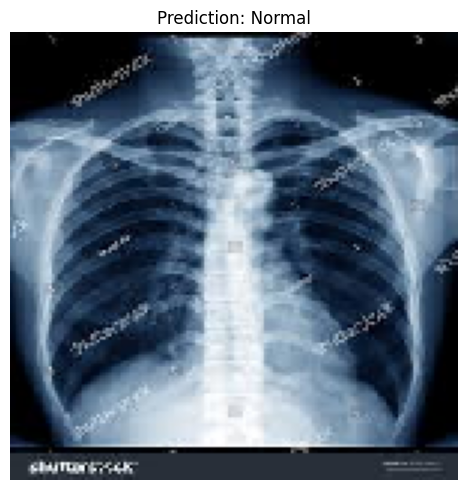

In [40]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt


uploaded = files.upload()


plt.figure(figsize=(10, 5))

for i, fn in enumerate(uploaded.keys()):

    img = image.load_img(fn, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0


    pred = model.predict(img_array)[0][0]
    label = "Pneumonia" if pred > 0.5 else "Normal"


    plt.subplot(1, len(uploaded), i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prediction: {label}")

plt.tight_layout()
plt.show()
